In [9]:
from PIL import Image, ImageChops

In [6]:
import os

In [23]:
path = "/home/hellimaxpc/Downloads/DevanagariHandwrittenCharacterDataset/Train/"
folder_list = list(os.walk(path))[0][1]

In [10]:
img = Image.open("/home/hellimaxpc/Downloads/DevanagariHandwrittenCharacterDataset/Train/character_1_ka/1340.png")

In [12]:
img = ImageChops.invert(img)

In [15]:
img.save("./1.png")

In [14]:
!pwd

/home/hellimaxpc/Major-project


In [17]:
folder_list.sort()

In [24]:
folder_list

['character_33_ha',
 'character_27_ra',
 'character_15_adna',
 'character_10_yna',
 'character_6_cha',
 'character_19_dha',
 'character_9_jha',
 'character_1_ka',
 'character_3_ga',
 'character_34_chhya',
 'character_25_ma',
 'character_31_petchiryakha',
 'character_13_daa',
 'character_2_kha',
 'character_35_tra',
 'character_14_dhaa',
 'character_5_kna',
 'character_32_patalosaw',
 'character_26_yaw',
 'character_4_gha',
 'character_17_tha',
 'character_20_na',
 'character_23_ba',
 'character_22_pha',
 'character_7_chha',
 'character_12_thaa',
 'character_8_ja',
 'character_29_waw',
 'character_30_motosaw',
 'character_21_pa',
 'character_11_taamatar',
 'character_28_la',
 'character_36_gya',
 'character_16_tabala',
 'character_24_bha',
 'character_18_da']

In [22]:
os.mkdir("data")

In [31]:
for i in folder_list:
    image_list = list(os.walk(path+i))[0][2]
    folder_name = i.split("_")[1]
    save_path = "./data/"+folder_name
    os.mkdir(save_path)
    count = 0
    for j in image_list:
        img = Image.open(path+i+"/"+j)
        img = ImageChops.invert(img)
        img.save(save_path+"/"+str(count)+".png")
        count = count+1

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [5]:
np.random.randint(10,90)

22

In [7]:
os.mkdir("Train_data")

In [45]:
raw_data_path = "./data/"
folder_list = list(os.walk(raw_data_path))[0][1]
for j in range(4,5):#for no: characters in image
    for i in range(10): # no: of images
        folder_no = np.random.randint(0,len(folder_list))
        img_list = list(os.walk(raw_data_path+folder_list[folder_no]))[0][2]
        img_no = np.random.randint(1,len(img_list)+1)
        img = cv2.imread(raw_data_path+folder_list[folder_no]+"/"+img_list[img_no])
        name = folder_list[folder_no]+"_"
        for k in range(j-1): #for no: of characters in image
            folder_no = np.random.randint(0,len(folder_list))
            img_list = list(os.walk(raw_data_path+folder_list[folder_no]))[0][2]
            img_no = np.random.randint(1,len(img_list)+1)
            img2 = cv2.imread(raw_data_path+folder_list[folder_no]+"/"+img_list[img_no])
            img = np.concatenate((img,img2),axis = 1)
            name = name+folder_list[folder_no]+"_"
        mimg.imsave("./Train_data/"+name+".png",img)
    #plt.imshow(img)
    #plt.show()

In [186]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
        out[coords] = 1

      # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy


In [4]:
img = cv2.imread("/home/hellimaxpc/Major-project/Train_data/9_35_14_6_27_5_18_29_4_16_.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


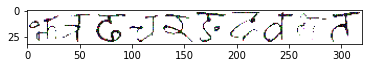

In [25]:
plt.imshow(noisy("gauss",img))

In [2]:
import tensorflow.keras.preprocessing.image as k_img 

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [187]:
augmentor = k_img.ImageDataGenerator(
rotation_range=3,
height_shift_range=0.3,
brightness_range=[0.5,1.5],
zoom_range=0.05,
shear_range=3
)

In [188]:
img = cv2.imread("/home/hellimaxpc/Major-project/Train_data/9_35_14_6_27_5_18_29_4_16_.png")

In [189]:
result = augmentor.flow(img.reshape((1,img.shape[0],img.shape[1],img.shape[2])),batch_size=1)

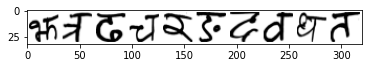

In [190]:
plt.imshow(img)

(32, 320, 3)


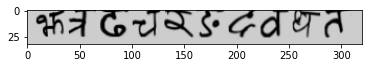

In [191]:
for i in range(1):
    image = next(result)[0].astype('uint8')
    cv2.imwrite("./hello.png",image)
    print(image.shape)
    plt.imshow(image)

In [ ]:
cv2.imwrite()